## Handwritten Image Detection with Keras using MNIST and Fashion MNIST data

In this exercise we will work with image data: specifically the famous MNIST and Fashion MNIST data sets.  MNIST data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white). Fashion MNIST data set contains 70,000 images of clothing in grayscale (0=black, 255 = white). All the images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work. <br><br>
We will use a Convolutional Neural Network and compare it with a linear neural network. 

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models.

In [ ]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop
from keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [ ]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# What is the corresponding label in the training set?
y_train[333]

8

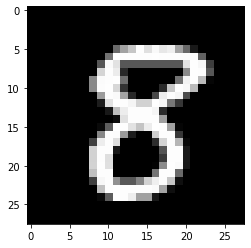

In [ ]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [ ]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [ ]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [ ]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .5 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.5))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='softmax'))

In [ ]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [ ]:
# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.8838 - accuracy: 0.7188 - val_loss: 0.2904 - val_accuracy: 0.9149
Epoch 2/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.4898 - accuracy: 0.8577 - val_loss: 0.2317 - val_accuracy: 0.9320
Epoch 3/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.4157 - accuracy: 0.8830 - val_loss: 0.2075 - val_accuracy: 0.9386
Epoch 4/30
60000/60000 [==============================] - 1s 25us/step - loss: 0.3794 - accuracy: 0.8957 - val_loss: 0.1921 - val_accuracy: 0.9426
Epoch 5/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.3550 - accuracy: 0.9008 - val_loss: 0.1880 - val_accuracy: 0.9460
Epoch 6/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.3463 - accuracy: 0.9059 - val_loss: 0.1792 - val_accuracy: 0.9508
Epoch 7/30
60000/60000 [==============================] - 1s 24us/st

In [ ]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18763218788420782
Test accuracy: 0.9609000086784363


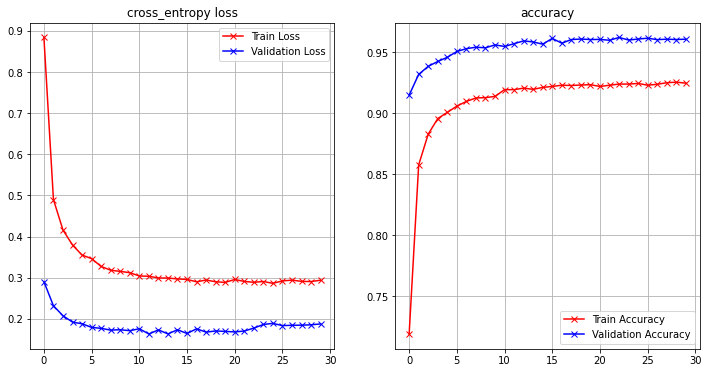

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    
plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

### Keras Layers for CNNs
- Previously we built Neural Networks using primarily the Dense, Activation and Dropout Layers.

- Here we will describe how to use some of the CNN-specific layers provided by Keras

#### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained:
- `filters`: the number of filter used per location.  In other words, the depth of the output.
- `kernel_size`: an (x,y) tuple giving the height and width of the kernel to be used
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`
- `input_shape`: required only for the first layer

Note, the size of the output will be determined by the kernel_size, strides

#### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified

#### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.


# Exercise
### Build your own CNN model
Use the Keras "Sequential" functionality to build a convolutional neural network `model_2` with the following specifications:
<br>
<br>
Model Architecture:<br>
We will build the famous LeNet-5 architecutre and measure its performance.
<br>
    Convolution -> Relu -> Max pooling -> Convolution -> Relu -> Max pooling -> FC1 -> Relu -> FC2 -> Relu -> Output(SoftMax)
<br>

1. Convolution1 kernel size: 5(H) x 5(W) x 6(filters), stride = 1, no padding
2. Max pooling1 kernel size: 2(H) x 2(W), stride = 2
3. Convolution2 kernel size: 5(H) x 5(W) x 16(filters), stride = 1, no padding
4. Max pooling2 kernel size: 2(H) x 2(W), stride = 2
5. Fully Connected1 size: 120
6. Fully Connected2 size: 84
7. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
8. Plot the loss and accuracy graph for training the new model 
9. Evaluate the model on test data

### Hints:
<ul>
  <li>You can match the model summary to the LeNet-5 diagram in your slides to verify your implmentation. 
<br>Slide: 07_Transfer_Learning -> Slide 27.
<li>
You will not be graded on the accuracy of your model but it should have a decent accuracy of at least 70%. Performance below 70% means there is something wrong with the implementation.
<li> Check how to connect the output of Convolution layer with first Fully connected layer.
<li> Do not use any padding or dropout in LeNet model, it can be used for Project Bonus / Fashion MNIST.
    </li></ul>

To use the LeNet model, we need to do some preprocessing on the data first.

In [ ]:
# Data is currently flattened i.e. m X 784, we need to reshape it back to 28 * 28. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 28, 28])
x_test = np.reshape(x_test, [-1, 28, 28])
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# LeNet requires input of 32 X 32. So, we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (2,2), (2, 2)), 'constant')
x_test=np.pad(x_test, ((0,0), (2,2), (2, 2)), 'constant')
x_train.shape, x_test.shape

((60000, 32, 32), (10000, 32, 32))

In [ ]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])
x_train.shape, x_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

Write your code below

In [ ]:
# Kartik Gupta, ASU ID: 1211493475
# This model is built with Le-Net 5 structure
#Conv Layer 1
model_2 = Sequential()
model_2.add(Conv2D(filters = 6, kernel_size = (5, 5), strides = 1, activation = 'relu', input_shape = (32,32,1)))
# Pooling layer 1
model_2.add(MaxPooling2D(pool_size =(2, 2), strides = 2))
#Layer 2
#Conv Layer 2
model_2.add(Conv2D(filters = 16, kernel_size = (5, 5), strides = 1, activation = 'relu', input_shape = (14,14,6)))
#Pooling Layer 2
model_2.add(MaxPooling2D(pool_size = 2, strides = 2))
#Flatten
model_2.add(Flatten())
#Layer 3
#Fully connected layer 1
model_2.add(Dense(units = 120, activation = 'relu'))
#Layer 4
#Fully connected layer 2
model_2.add(Dense(units = 84, activation = 'relu'))
#Layer 5
#Output Layer
model_2.add(Dense(units = 10, activation = 'softmax'))

model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_7 (Dense)              (None, 84)               

In [ ]:
# Compiling model_2
learning_rate = .001
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])

batch_size = 128  # mini-batch with 128 examples
epochs = 20   # 20 epochs
history = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 31s 513us/step - loss: 0.2877 - accuracy: 0.9113 - val_loss: 0.0926 - val_accuracy: 0.9718
Epoch 2/20
60000/60000 [==============================] - 30s 506us/step - loss: 0.0778 - accuracy: 0.9758 - val_loss: 0.0517 - val_accuracy: 0.9818
Epoch 3/20
60000/60000 [==============================] - 31s 514us/step - loss: 0.0522 - accuracy: 0.9840 - val_loss: 0.0427 - val_accuracy: 0.9846
Epoch 4/20
60000/60000 [==============================] - 31s 513us/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.0396 - val_accuracy: 0.9873
Epoch 5/20
60000/60000 [==============================] - 31s 512us/step - loss: 0.0318 - accuracy: 0.9898 - val_loss: 0.0423 - val_accuracy: 0.9865
Epoch 6/20
60000/60000 [==============================] - 30s 506us/step - loss: 0.0261 - accuracy: 0.9916 - val_loss: 0.0280 - val_accuracy: 0.9907
Epoch 7/20
60000/60000 [==============================] 

In [ ]:
## Evaluating the model_2 on the test data for test loss and test acuracy

score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.047990676363481484
Test accuracy: 0.9914000034332275


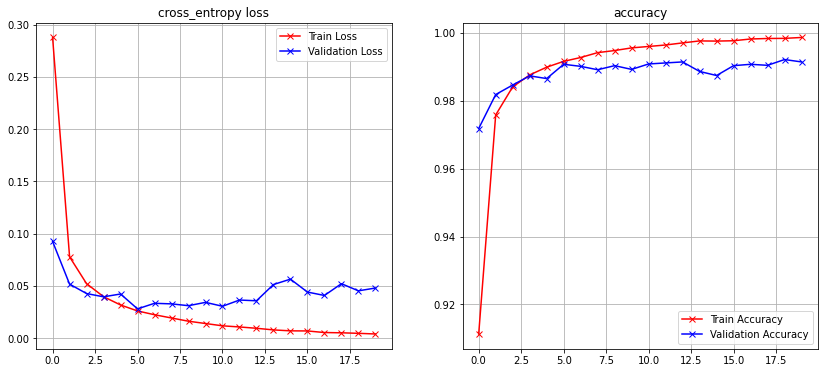

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    
plot_loss_accuracy(history)

## Answer following questions

1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy?  Which do you think is more meaningful, the loss or the accuracy?

**Answer** 1) Model_2 shows higher test accuracy with more than 99% and lower test loss as compared to model_1. model_2 most effeciently uses the convulations to learn features on the data set. Model 2 consists of deeper neural networks that means it consists of more layers than model 1 and does better optimization of weights leading to higher accuracy than model 1. Therefore, I prefer model_2 over model_1. I would definitely choose model_2 to put into production because our model should be able to deal with the unseen data. Test accuracy and Test loss demonstrates the capability of the model to deal with the unseen data. Since both train loss and accuracy are better for the model_2 where we used Le-net 5 CNN model, therefore, I prefer to use model_2. Also, the deeper neural network is being represented by the second model which leads to better optimization of weights and more accurate model.

**Answer** 2)  For both the models train loss dcreases with a steep slope initially and then decreases gradually. However, for the model 2 the loss function keeps on decreasing for the entire run, whereas, for model 1 tests loss almost becomes constant after 15 epochs. For the test set, the loss function for model 2 begins at 0.09 and gradually decreases to 0.05 approximately, however, the loss function for model_1 begins at 0.30 and gradually decreases to 0.20 approximately. The loss function is used to train the neural network and optimize the weights. Better loss function means the better prediction model. Model 1 has higher value for test and train loss throughout the trajectory. suggesting that model 2 better for prediction than model 1.

Accuracy for both the models is like a mirror image of the loss function with respect to x-axis. Training accuracy increases for model 2 and resembles a log function. Training Accuracy for model 1 also increases gradually. However the training accuracy for the model 2 is higher than model 1. Test accuracy for model 2 is icreases and decreases in small steps for the entire number of epochs. Finally, the test accuracy for model 2 is more than 99% which is higher than the model 1 which almost becomes consistent after the run of 20 epochs.

A loss function is used to optimize a machine learning algorithm. Loss value implies how poorly or well a model behaves after each iteration of optimization. An accuracy metric is used to measure the algorithm's performance in an interpretable way. Its basically how many correct predictions based on the total number of predictions. I believe that loss function is more important than the accuracy because a model learn by means of a loss function. It evaluates how well specific algorithm models the given data. If predictions deviates too much from actual results, loss function would result in a very large number.

# Fashion MNIST
We will do the similar things for Fashion MNIST dataset. Fashion MNIST has 10 categories of clothing items:<br>

| Label | Description | 
| --- | --- | 
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [ ]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
         42,  92,  71, 107,  33,   0,   3,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  23,
        145,   0,   0,   0, 113,  20,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89,
          8,   0,  10,   0,  36, 104,   0,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  37,  97,
          0,   5,   1,   0,   0, 141,  23,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  70,  75,
          0,   6,   1,   0,   0, 141,  56,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  85,  57,
          0,   5,   1,   1,   0, 126,  62,   0,   6,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# What is the corresponding label in the training set?
y_train[333]

8

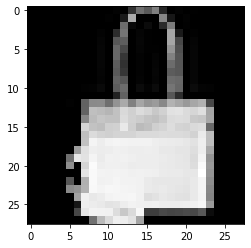

In [ ]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [ ]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [ ]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255

In [ ]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

## Reperforming the earlier preprocessing methods

In [ ]:
# Data is currently flattened i.e. m X 784, we need to reshape it back to 28 * 28. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 28, 28])
x_test = np.reshape(x_test, [-1, 28, 28])
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# LeNet requires input of 32 X 32. So, we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (2,2), (2, 2)), 'constant')
x_test=np.pad(x_test, ((0,0), (2,2), (2, 2)), 'constant')
x_train.shape, x_test.shape

((60000, 32, 32), (10000, 32, 32))

In [ ]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])
x_train.shape, x_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

Build a similar convolutional model with a differnet structure, learning rate or number of epochs, etc. that you think will result in a good model for this dataset. Report the accuracy on test dataset.

In [ ]:
# write your code here.
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.optimizers import RMSprop
from keras.datasets import fashion_mnist

In [ ]:
model_3 = Sequential()
#Conv Layer 1
model_3.add(Conv2D(filters = 32, kernel_size = (4, 4),padding = "same", strides = 1, activation = 'relu', input_shape = (32,32,1)))
# Pooling layer 1
model_3.add(MaxPooling2D(pool_size =(2, 2), strides = 2))
#Layer 2 - batch normalization
#Dropout layer followed by Conv Layer
model_3.add(BatchNormalization())
model_3.add(Dropout(0.4))
model_3.add(Conv2D(filters = 64, kernel_size = (4, 4),padding = "same", strides = 1, activation = 'relu', input_shape = (28,28,1)))
#Pooling Layer, batch normalization, dropout
model_3.add(MaxPooling2D(pool_size = 2, strides = 2))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.4))
#Flatten
model_3.add(Flatten())
#Fully connected layer 1
model_3.add(Dense(units = 128, activation = 'relu'))
#Output Layer
model_3.add(Dense(units = 10, activation = 'softmax'))

model_3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        544       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        32832     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 8, 8, 64)        

In [ ]:
# Compiling model_3
learning_rate = .001
model_3.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])

batch_size = 64 
epochs = 25   # 25 epochs
history = model_3.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 153s 3ms/step - loss: 0.1961 - accuracy: 0.9313 - val_loss: 0.2281 - val_accuracy: 0.9230
Epoch 2/25
60000/60000 [==============================] - 153s 3ms/step - loss: 0.1865 - accuracy: 0.9334 - val_loss: 0.2280 - val_accuracy: 0.9214
Epoch 3/25
60000/60000 [==============================] - 152s 3ms/step - loss: 0.1821 - accuracy: 0.9358 - val_loss: 0.2160 - val_accuracy: 0.9256
Epoch 4/25
60000/60000 [==============================] - 152s 3ms/step - loss: 0.1809 - accuracy: 0.9354 - val_loss: 0.2195 - val_accuracy: 0.9252
Epoch 5/25
60000/60000 [==============================] - 152s 3ms/step - loss: 0.1816 - accuracy: 0.9345 - val_loss: 0.2266 - val_accuracy: 0.9249
Epoch 6/25
60000/60000 [==============================] - 152s 3ms/step - loss: 0.1792 - accuracy: 0.9367 - val_loss: 0.2273 - val_accuracy: 0.9210
Epoch 7/25
60000/60000 [==============================] - 152s

In [ ]:
## Evaluating the model_3 on the test data for test loss and test acuracy

score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22141424026489256
Test accuracy: 0.9243999719619751
